In [1]:
#Import

import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import AutoMinorLocator

from biasmodels import *
from CAMBsolver import Solver 

#Set current directory
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd())))
sys.path.append(SCRIPT_DIR)
print(SCRIPT_DIR)

# Configuration

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          'xtick.direction': 'out',  
          'ytick.direction': 'out',  
          'xtick.minor.visible': True,  
          'ytick.minor.visible': True
          }

plt.rcParams.update(params)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/danielsb/Documents/GitHub


In [2]:
# Redshift bins

z_bins = np.array([0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95])

# Separations

dist = [
    np.arange(20, 164, 4),
    np.arange(32, 164, 4),
]

params_dict0 = {
    'h' : 0.677,
    'As' : 2.05e-9,
    'ns' : 0.965,
    'Ob' : 0.0490, # This is here the density parameter of Baryons
    'Om' : 0.3111, # This is here the density parameter of Cold Dark Matter
}

steps = [1e-3, 1e-1, 1e-4, 1e-2, 1e-2]

Fitting functions

In [3]:
def sbias_fit(x, a, b, c, d):
    return  a + b * x + c * np.log(x) + d * (np.log(x))**2

def nevol_fit(x, a, b, c, d):
    return a + b * x + c * (1/x) + d * np.exp(-x)

def fevol_fit(x, a0, a, b, c, d):
    return a0 + a * x + b * np.log(x) + c * np.exp(x) + d * (np.log(x))**2

Splittings

In [4]:
cl_biases = {}

m_splits = [10/3, 2.0, 10/7]

splits_names = ['30x70', '50x50', '70x30']

for k, m in enumerate(m_splits):
    mySolver = Solver(zs=[0.0], **params_dict0, NonLin=False, silent=True)
    cl_biases[splits_names[k]] = EvolutionBias(n_split = m, CAMBsolver = mySolver, to_list = False)

In [5]:
sB_splits = {}
sM_splits = {}
sF_splits = {}
nevol_splits = {}
fevolB_splits = {}
fevolF_splits = {}

for i, k in enumerate(cl_biases.keys()):
    sB_splits[k] = cl_biases[k].s_bright(z_bins)
    sM_splits[k] = cl_biases[k].s_model(z_bins)
    sF_splits[k] = cl_biases[k].s_faint(z_bins)
    nevol_splits[k] = cl_biases[k].dLogN(z_bins)
    fevolB_splits[k] = cl_biases[k].fevol_bright(z_bins)
    fevolF_splits[k] = cl_biases[k].fevol_faint(z_bins)

# Magnification bias

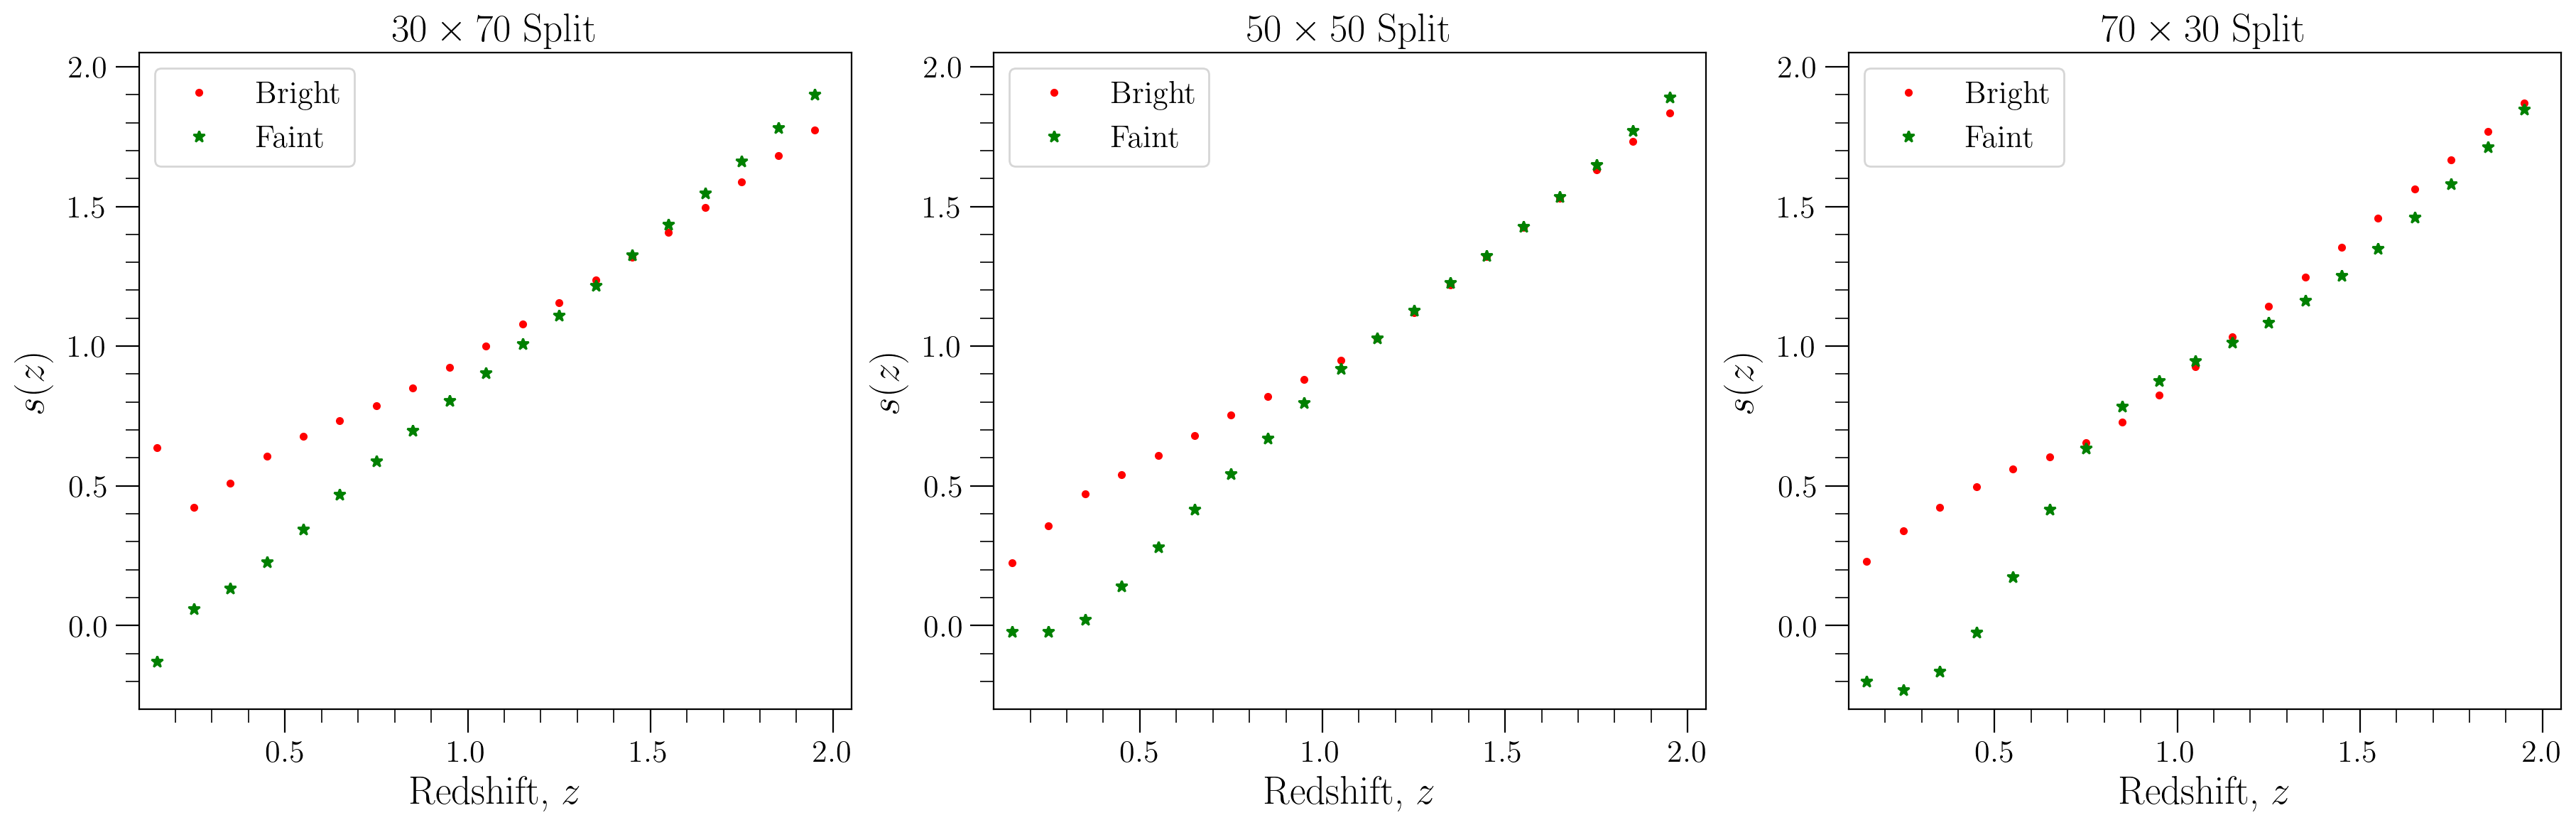

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (22,6))

ax[0].plot(z_bins, sB_splits['30x70'], 'r.', lw = 1.5, label='Bright')
ax[0].plot(z_bins, sF_splits['30x70'], 'g*', lw = 1.5, label='Faint')
ax[0].set_title(r'$30\times 70$ Split', fontsize = 20)

ax[1].plot(z_bins, sB_splits['50x50'], 'r.', lw = 1.5, label='Bright')
ax[1].plot(z_bins, sF_splits['50x50'], 'g*', lw = 1.5, label='Faint')
ax[1].set_title(r'$50\times 50$ Split', fontsize = 20)

ax[2].plot(z_bins, sB_splits['70x30'], 'r.', lw = 1.5, label='Bright')
ax[2].plot(z_bins, sF_splits['70x30'], 'g*', lw = 1.5, label='Faint')
ax[2].set_title(r'$70\times 30$ Split', fontsize = 20)

# Add extra space between y-axis label and tick params
ax[0].yaxis.set_label_coords(-0.12, 0.5)
ax[1].yaxis.set_label_coords(-0.12, 0.5)
ax[2].yaxis.set_label_coords(-0.12, 0.5)

for axi in ax:
    axi.set_xlim(0.1, 2.05)
    axi.set_ylim(-0.3, 2.05)
    axi.tick_params(axis='both', which='major', labelsize=16, size=12)
    axi.tick_params(axis='both', which='minor', size=7)
    axi.xaxis.label.set_size(20)
    axi.yaxis.label.set_size(20)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$s(z)$')
    axi.legend(loc='upper left')
    
plt.savefig("plots/sbias_models_splits.pdf", bbox_inches='tight', format='pdf')

# Number Density Evolution

Text(0.5, 1.0, 'Number density evolution')

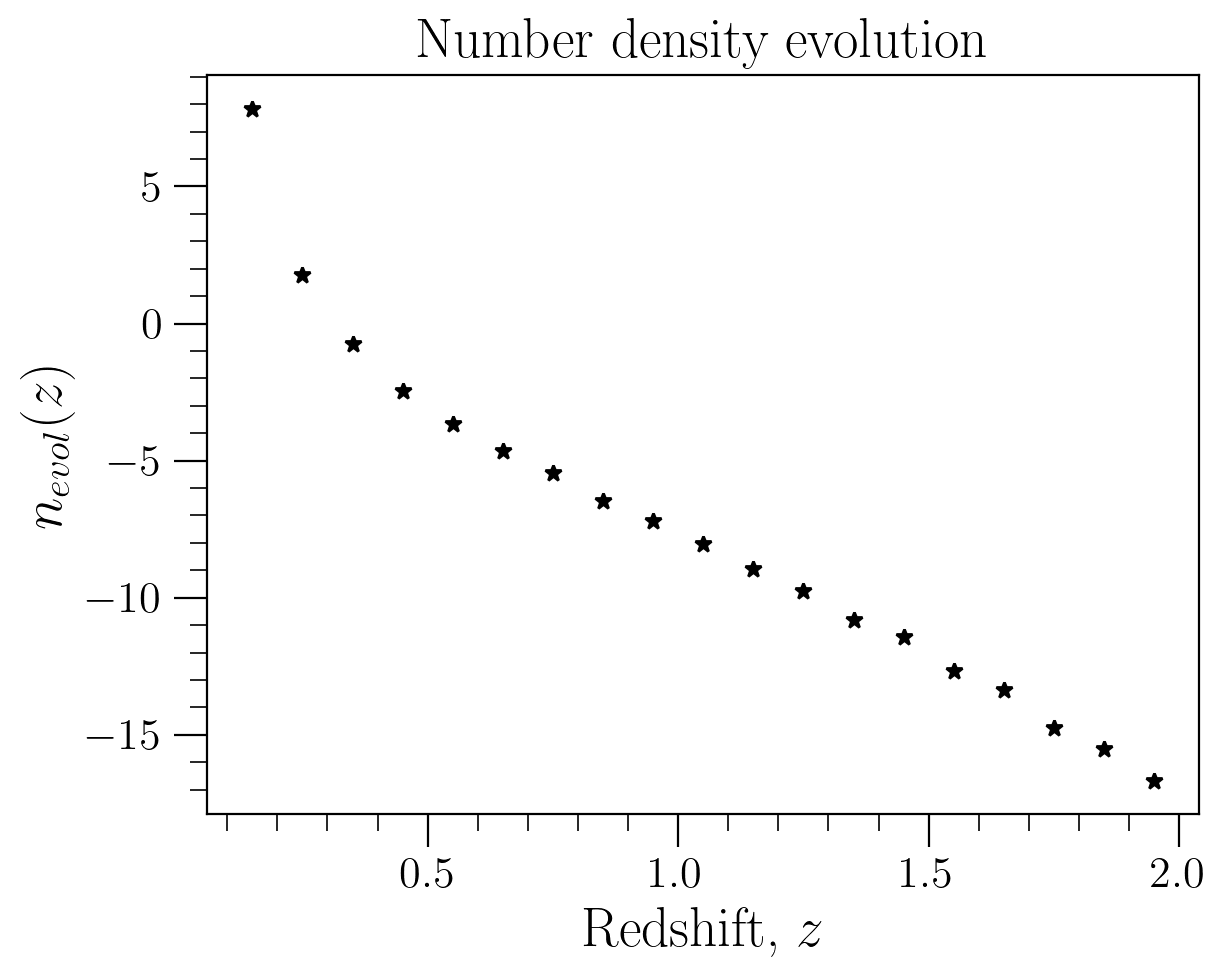

In [37]:
plt.plot(z_bins, nevol_splits['30x70'], 'k*')

plt.tick_params(axis='both', which='major', labelsize=16, size=12)
plt.tick_params(axis='both', which='minor', size=6)

plt.xlabel(r'Redshift, $z$', fontsize = 20)
plt.ylabel(r'$n_{evol}(z)$', fontsize = 20)
plt.title('Number density evolution', fontsize = 20)



# Evolution Bias

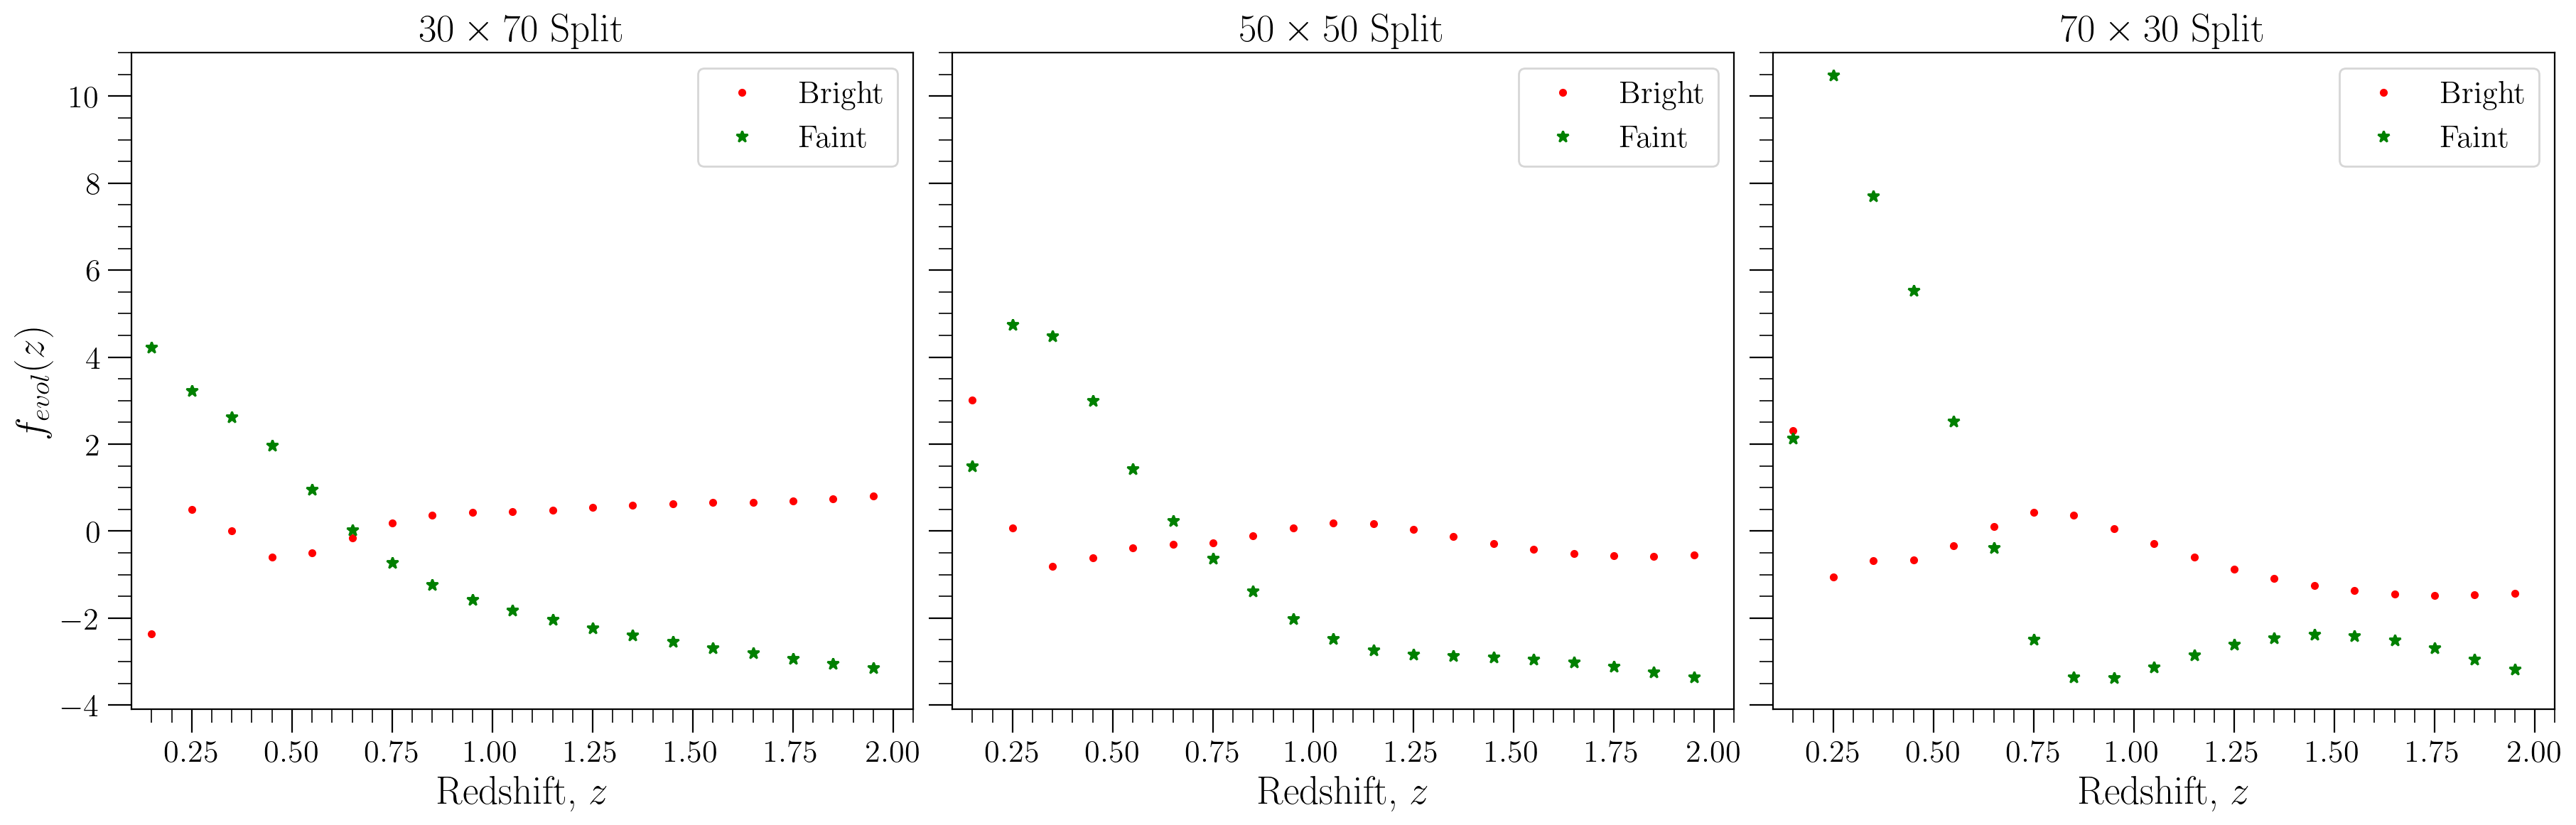

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (22,6), sharey='row')
plt.subplots_adjust(wspace=0.05)  # Adjust left, right margins and spacing

ax[0].plot(z_bins, fevolB_splits['30x70'], 'r.', lw = 1.5, label='Bright')
ax[0].plot(z_bins, fevolF_splits['30x70'], 'g*', lw = 1.5, label='Faint')
ax[0].set_title(r'$30\times 70$ Split', fontsize = 20)

ax[1].plot(z_bins, fevolB_splits['50x50'], 'r.', lw = 1.5, label='Bright')
ax[1].plot(z_bins, fevolF_splits['50x50'], 'g*', lw = 1.5, label='Faint')
ax[1].set_title(r'$50\times 50$ Split', fontsize = 20)

ax[2].plot(z_bins, fevolB_splits['70x30'], 'r.', lw = 1.5, label='Bright')
ax[2].plot(z_bins, fevolF_splits['70x30'], 'g*', lw = 1.5, label='Faint')
ax[2].set_title(r'$70\times 30$ Split', fontsize = 20)

# Add extra space between y-axis label and tick params
ax[0].set_ylabel(r'$f_{evol}(z)$')
ax[0].yaxis.set_label_coords(-0.1, 0.5)
#ax[1].yaxis.set_label_coords(-0.12, 0.5)
#ax[2].yaxis.set_label_coords(-0.12, 0.5)

for axi in ax:
    axi.set_xlim(0.1, 2.05)
    axi.set_ylim(-4.1, 11.0)
    axi.tick_params(axis='both', which='major', labelsize=16, size=12)
    axi.tick_params(axis='both', which='minor', size=7)
    axi.xaxis.label.set_size(20)
    axi.yaxis.label.set_size(20)
    axi.set_xlabel(r'Redshift, $z$')
    #axi.set_ylabel(r'$f_{evol}(z)$')
    axi.legend(loc='upper right')
        
plt.savefig("plots/fevol_models_splits.pdf", bbox_inches='tight', format='pdf')